# Logistic Regression from Scratch


A researcher might be interested in knowing what
makes a successful politician. For the purpose of this blog post, "success"
means the probability of winning an election. In that case, it would be sub-optimal
to use a linear regression model to see what factors are associated with successful
politicians, since the outcome variable is binary (a politician either wins or loses an election).
The linear model is built around the idea that the outcome variable is continuous. What if
the statistician tries to sees what factors are influencing the **probability** of
winning? This strategy naturally lends itself to using a [logistic model](https://en.wikipedia.org/wiki/Logistic_regression) (or a [probit](https://en.wikipedia.org/wiki/Probit_model)).
In this blog post, I derive the logistic model from scratch and show how one
can estimate its parameters.

## The logistic model

The outcome variable $y_i$ is either $1$ ("winning") or $0$ ("losing"). The logistic
model makes the assumption that the probability of winning is given by the logistic
function :

$$ f(y_i | x_{i}, \theta_{i}) =  \sigma(x_{i} '\theta)$$

with $\sigma(v) = \frac{exp(v)}{1+exp(v)}$

The probability of losing is 1 minus the probability of wining:

$$ f(y_i | x_{i}, \theta) =  1 - \sigma(x_{i} '\theta)$$

## Log-likelihood function

To understand what makes a successful politician (or to predict who is going to win the next elections), one must estimate the value of $\theta$ using the information contained in the sample $(y_i, x_i)_{i=1}^{N}$. One "natural" criterion is to find the value for $\theta$ that **maximizes the probability of observing the
sample**. This procedure is called [Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). Let us assume that sample is [i.i.d](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables). If the i.i.d assumption holds, the probability of observing the $(y_i, x_i)_{i=1}^{N}$ is the product of the probability of observing each observation. Instead of maximizing the likelihood, it is more convenient to maximize the log-likelihood, which transforms the product of probabilities into a sum:

$$ L((y_i, x_i)_{i=1}^{N};\theta) = log( \prod_{i=1}^{N}f(y_i | x_{i}, \theta)) = \sum_{i=1}^{N} log(f(y_i | x_{i}, \theta_{i}))$$

The probability of observing $y_i$  can be compactly written as

$$ f(y_i | x_{i}, \theta_{i}) = \sigma(x_{i} '\theta)^{y_i}(1 - \sigma(x_{i} '\theta))^{1 - y_i} $$

Hence, the log-likelihood function writes:

$$L((y_i, x_i)_{i=1}^{N};\theta) = \sum_{i=1}^{N} y_i log(\sigma(x_{i} '\theta)) + (1 - y_i)log(1 - \sigma(x_{i} '\theta))$$

## Maximum Likelihood Estimation

Taking the derivative of $f(y_i | x_{i}, \theta)$ with respect to $\theta$ gives:

$$ f_{\theta}(y_i | x_{i}, \theta) = [y_i - \sigma(x_{i} '\theta)] x_{i} $$

and the derivative of the log-likelihood function with respect to $\theta$ is:

$$L_{\theta}((y_i, x_i)_{i=1}^{N};\theta) = \sum_{i=1}^{N}[y_i - \sigma(x_{i} '\theta)] x_{i}$$


## Gradient descent

To make the link with this [blog post](https://julienpascal.github.io/post/ols_ml/), let us use gradient descent to find the MLE estimate:

$$ \theta_{i+1} = \theta_{i} - \gamma L_{\theta}((y_i, x_i)_{i=1}^{N};\theta_{i})$$


## Implementation in Julia

In [250]:
using Distributions
using Plots
using DataFrames
using GLM

┌ Info: Recompiling stale cache file /home/julien/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1190


In [21]:
# Logistic function for a scalar input:
function sigma(x::Float64)
    exp(x)/(1.0 + exp(x))
end

# Logistic function for a vector input:
function sigma(x::Array{Float64,1})
    exp.(x) ./ (1.0 .+ exp.(x))
end

sigma (generic function with 3 methods)

In [375]:
# Function to calculate the log-likelihood of the sample:
function derivative_log_likelihood(y::Array{Float64,1}, X::Array{Float64,2}, theta::Array{Float64,1})
    sum = zeros(size(X,2))
    #Loop over individuals in the sample
    for i=1:size(X,1)
        sum .+= (y[i] - sigma(transpose(X[i,:])*theta))*X[i,:]
    end
    return sum
end

derivative_log_likelihood (generic function with 1 method)

In [376]:
#Options
N_individuals = 100000 #how many individuals in the sample?
dim_X = 5 #How many dimensions for x

5

In [472]:
#Generation of a sample:
#----------------------
d = Normal(0,1)
n = Normal(0,1)
# Generate true parameter values:
theta0 = [1; 2; 3; 4; 5]
# Generate X:
X = rand(d,N_individuals, dim_X)
X[:,1] = ones(N_individuals)
# Generate the y:
proba_success = sigma(X*theta0)
y = ifelse.(proba_success.>0.5, 1.0, 0.0);

# Convert y to a binary outcome
#proba_success = X*theta0 .+ rand(n, N_individuals)
#y = ifelse.(proba_success.>0., 1.0, 0.0);

In [473]:
X

100000×5 Array{Float64,2}:
 1.0  -1.09228     0.667985    0.27063     0.652415 
 1.0  -1.3396      0.840733   -0.549661    0.875565 
 1.0   0.0807377   1.09773    -0.912732    0.166161 
 1.0   0.903698   -1.12924     0.718036   -1.17585  
 1.0   0.619639    0.27345    -0.46042     0.568111 
 1.0   1.68846     0.203818    0.749868   -0.366966 
 1.0   0.50731     0.656654   -0.778407   -0.959301 
 1.0  -0.322033    0.761347   -0.2518     -0.651745 
 1.0   1.82971    -0.813413   -1.28091     1.12988  
 1.0  -0.341449   -0.641448   -0.0996482  -1.12149  
 1.0   0.803267    0.051707    0.589233    1.58605  
 1.0   0.0459243  -0.942007   -0.11058     0.0456874
 1.0   2.38091     0.0457845  -1.38952    -2.63467  
 ⋮                                                  
 1.0  -0.423906    0.0831956  -0.945276    0.536585 
 1.0   1.44792    -2.11264    -0.0609935  -1.18075  
 1.0  -0.536385    0.454792    0.0123028   1.72462  
 1.0  -0.986448   -1.71102    -0.350946   -0.716434 
 1.0   0.118981   -

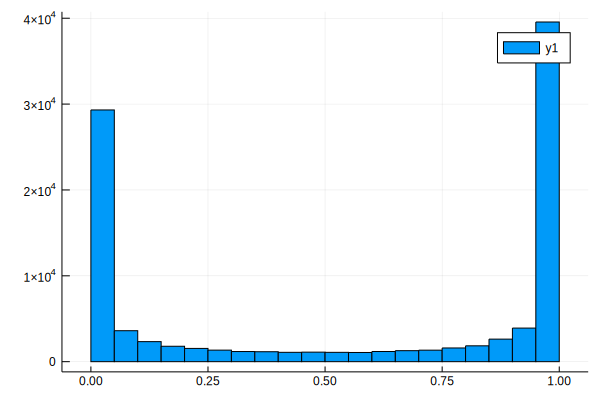

In [474]:
histogram(proba_success, bins=20)

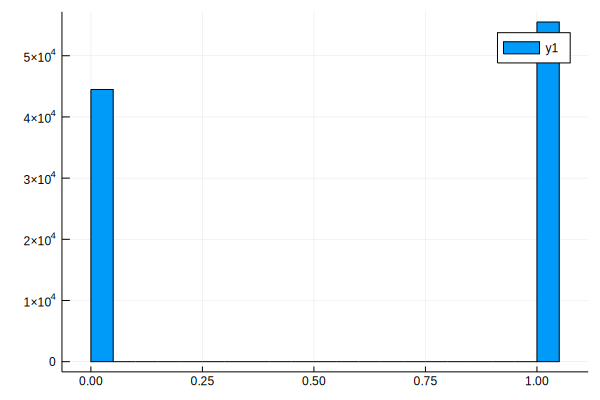

In [475]:
histogram(y)

In [476]:
#initial value for theta:
theta_old = zeros(dim_X)
theta_new = zeros(dim_X)
learning_rate = 0.000001
max_iter = 1000
for i=1:max_iter 
    theta_new = theta_old + learning_rate*derivative_log_likelihood(y, X, theta_old)
    diff = maximum(abs, theta_new .- theta_old)
    #println(diff)
    theta_old = theta_new
end

In [477]:
proba_success_predicted = sigma(X*theta_old)
# Convert y to a binary outcome
y_predicted = ifelse.(proba_success_predicted .>0.5, 1.0, 0.0);

In [490]:
theta_old

5-element Array{Float64,1}:
 0.7184803352514193
 1.4256372426343338
 2.1576013633457   
 2.877836705753454 
 3.6075406357519353

In [491]:
theta0

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

Parameters are identified up to a scale: 
[EXPLAIN MORE USING LATENT VARIABLES]

In [492]:
mean(theta0./theta_old)

1.3922119201746068

In [493]:
theta_old.* (1.39)

5-element Array{Float64,1}:
 0.9986876659994728
 1.9816357672617237
 2.9990658950505225
 4.000193020997301 
 5.01448148369519  

We don't need the scale to make accurate predictions:

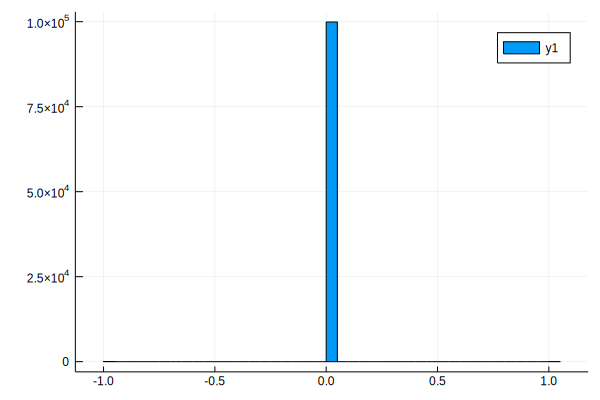

In [494]:
histogram(y_predicted - y)